In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import time as t
import datetime
import pytz
import scipy as sp

# Basic Setup

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time as t

In [3]:
v = 0.4
w = 1
N = 200

#populate H:
H = np.zeros(( 2*N,2*N ),dtype=np.float64)
for k in range(N):
  H[2*k-1,2*k] = w
  H[2*k,2*k-1] = w
  H[2*k,2*k+1] = v
  H[2*k+1,2*k] = v
H[-1,0] = 0
H[0,-1] = 0

print(H)


[[0.  0.4 0.  ... 0.  0.  0. ]
 [0.4 0.  1.  ... 0.  0.  0. ]
 [0.  1.  0.  ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.  1.  0. ]
 [0.  0.  0.  ... 1.  0.  0.4]
 [0.  0.  0.  ... 0.  0.4 0. ]]


In [7]:
steps = 101
v_arr = np.linspace(0, 3, steps)
w = 1
N = 20
E_arr = []

for i, v in enumerate(v_arr):
  H = np.zeros(( 2*N,2*N ),dtype=np.float64)
  for k in range(N):
    H[2*k-1,2*k] = w
    H[2*k,2*k-1] = w
    H[2*k,2*k+1] = v
    H[2*k+1,2*k] = v
  H[-1,0] = 0
  H[0,-1] = 0

  e_val, e_vec = np.linalg.eigh(H)
  E_arr.append(np.sort(e_val))

Text(0, 0.5, 'Energy')

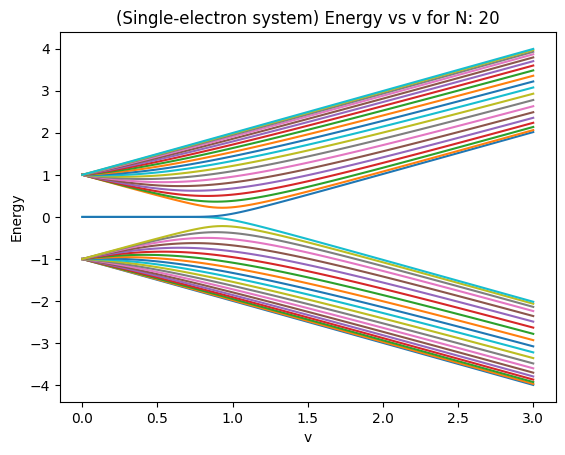

In [8]:
E_arr_2 = np.zeros((2*N, steps), dtype=np.float64)

for i in range(steps):
  for j in range(2*N):
    E_arr_2[j,i] = E_arr[i][j]

# print(E_arr_2)
for e_arr in E_arr_2:
  plt.plot(v_arr,e_arr)
plt.title(f"(Single-electron system) Energy vs v for N: {N}")
plt.xlabel("v")
plt.ylabel("Energy")

In [ ]:
start_time = t.time()
eigenvalues, eigenvectors = np.linalg.eig(H)
end_time = t.time()
print(f"Time taken: {end_time - start_time} seconds")

print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)

# Diagonalizing for Dense Matrix (Basic)

### Using numpy.linalg.eig
Computes eigenvalues and eigenvectors of a general square matrix.

In [2]:
steps = 101
v_arr = np.linspace(0, 3, steps)
w = 1
N = 400


f = h5py.File('ssh_simulation_time_data_v2.h5', 'a')
utc_now = datetime.datetime.now(pytz.utc)
ist_timezone = pytz.timezone('Asia/Kolkata')
ist_now = utc_now.astimezone(ist_timezone)
group_name = f"N_{N}_steps_{steps}_w_{w}_{ist_now.strftime('%Y-%m-%d-%H-%M-%S')}"
# group_name = f"N_{N}_steps_{steps}_v_{v}"
simulation_group = f.create_group(group_name)



tot_t_start = t.time()

for i, v in enumerate(v_arr):
  H = np.zeros(( 2*N,2*N ),dtype=np.float64)
  for k in range(N):
    H[2*k-1,2*k] = w
    H[2*k,2*k-1] = w
    H[2*k,2*k+1] = v
    H[2*k+1,2*k] = v
  H[-1,0] = 0
  H[0,-1] = 0

  t_start = t.time()
  e_val_raw, e_vec_raw = np.linalg.eig(H)
  t_end = t.time()

  e_val = np.sort(e_val_raw)
  e_vec = e_vec_raw[:,np.argsort(e_val_raw)]

  step_group = simulation_group.create_group(f"v_{v}")
  # step_group = simulation_group.create_group(f"w_{w}")
  # step_group.create_dataset("eigenvalues", data=e_val)
  # step_group.create_dataset("eigenvectors", data=e_vec)
  parameters = {
      'No_of_unit_cells': N,
      'v': v,
      'w': w,
      "Total_time": t_end-t_start,
  }

  for key, value in parameters.items():
    step_group.attrs[key] = value


tot_t_end = t.time()


parameters = {
    'No_of_unit_cells': N,
    'No_of_v_steps': steps,
    'v_array': v_arr,
    'w': w,
    "Total_time": tot_t_end-tot_t_start,
    "Method": "np.linalg.eig",
}

# parameters = {
#     'No_of_unit_cells': N,
#     'No_of_w_steps': steps,
#     'w_array': w_arr,
#     'v': v,
# }


for key, value in parameters.items():
  simulation_group.attrs[key] = value

f.close()

### Using numpy.linalg.eigh
For symmetric/Hermitian matrices

In [3]:
steps = 101
v_arr = np.linspace(0, 3, steps)
w = 1
N = 400


f = h5py.File('ssh_simulation_time_data_v2.h5', 'a')
utc_now = datetime.datetime.now(pytz.utc)
ist_timezone = pytz.timezone('Asia/Kolkata')
ist_now = utc_now.astimezone(ist_timezone)
group_name = f"N_{N}_steps_{steps}_w_{w}_{ist_now.strftime('%Y-%m-%d-%H-%M-%S')}"
# group_name = f"N_{N}_steps_{steps}_v_{v}"
simulation_group = f.create_group(group_name)



tot_t_start = t.time()

for i, v in enumerate(v_arr):
  H = np.zeros(( 2*N,2*N ),dtype=np.float64)
  for k in range(N):
    H[2*k-1,2*k] = w
    H[2*k,2*k-1] = w
    H[2*k,2*k+1] = v
    H[2*k+1,2*k] = v
  H[-1,0] = 0
  H[0,-1] = 0

  t_start = t.time()
  e_val_raw, e_vec_raw = np.linalg.eigh(H)
  t_end = t.time()

  e_val = np.sort(e_val_raw)
  e_vec = e_vec_raw[:,np.argsort(e_val_raw)]

  step_group = simulation_group.create_group(f"v_{v}")
  # step_group = simulation_group.create_group(f"w_{w}")
  # step_group.create_dataset("eigenvalues", data=e_val)
  # step_group.create_dataset("eigenvectors", data=e_vec)
  parameters = {
      'No_of_unit_cells': N,
      'v': v,
      'w': w,
      "Total_time": t_end-t_start,
  }

  for key, value in parameters.items():
    step_group.attrs[key] = value


tot_t_end = t.time()


parameters = {
    'No_of_unit_cells': N,
    'No_of_v_steps': steps,
    'v_array': v_arr,
    'w': w,
    "Total_time": tot_t_end-tot_t_start,
    "Method": "np.linalg.eigh",
}

# parameters = {
#     'No_of_unit_cells': N,
#     'No_of_w_steps': steps,
#     'w_array': w_arr,
#     'v': v,
# }


for key, value in parameters.items():
  simulation_group.attrs[key] = value

f.close()

### Using numpy.linalg.eigvalsh
Only computes eigenvalues for symmetric/Hermitian matrices.

In [4]:
steps = 101
v_arr = np.linspace(0, 3, steps)
w = 1
N = 400


f = h5py.File('ssh_simulation_time_data_v2.h5', 'a')
utc_now = datetime.datetime.now(pytz.utc)
ist_timezone = pytz.timezone('Asia/Kolkata')
ist_now = utc_now.astimezone(ist_timezone)
group_name = f"N_{N}_steps_{steps}_w_{w}_{ist_now.strftime('%Y-%m-%d-%H-%M-%S')}"
# group_name = f"N_{N}_steps_{steps}_v_{v}"
simulation_group = f.create_group(group_name)



tot_t_start = t.time()

for i, v in enumerate(v_arr):
  H = np.zeros(( 2*N,2*N ),dtype=np.float64)
  for k in range(N):
    H[2*k-1,2*k] = w
    H[2*k,2*k-1] = w
    H[2*k,2*k+1] = v
    H[2*k+1,2*k] = v
  H[-1,0] = 0
  H[0,-1] = 0

  t_start = t.time()
  e_val_raw = np.linalg.eigvalsh(H)
  t_end = t.time()

  e_val = np.sort(e_val_raw)
  # e_vec = e_vec_raw[:,np.argsort(e_val_raw)]

  step_group = simulation_group.create_group(f"v_{v}")
  # step_group = simulation_group.create_group(f"w_{w}")
  # step_group.create_dataset("eigenvalues", data=e_val)
  # step_group.create_dataset("eigenvectors", data=e_vec)
  parameters = {
      'No_of_unit_cells': N,
      'v': v,
      'w': w,
      "Total_time": t_end-t_start,
  }

  for key, value in parameters.items():
    step_group.attrs[key] = value


tot_t_end = t.time()


parameters = {
    'No_of_unit_cells': N,
    'No_of_v_steps': steps,
    'v_array': v_arr,
    'w': w,
    "Total_time": tot_t_end-tot_t_start,
    "Method": "np.linalg.eigvalsh",
}

# parameters = {
#     'No_of_unit_cells': N,
#     'No_of_w_steps': steps,
#     'w_array': w_arr,
#     'v': v,
# }


for key, value in parameters.items():
  simulation_group.attrs[key] = value

f.close()

# Diagonalizing for Tridiagonal Matrix
### Using scipy.linalg.eigh_tridiagonal

In [5]:
steps = 101
v_arr = np.linspace(0, 3, steps)
w = 1
N = 400


f = h5py.File('ssh_simulation_time_data_v2.h5', 'a')
utc_now = datetime.datetime.now(pytz.utc)
ist_timezone = pytz.timezone('Asia/Kolkata')
ist_now = utc_now.astimezone(ist_timezone)
group_name = f"N_{N}_steps_{steps}_w_{w}_{ist_now.strftime('%Y-%m-%d-%H-%M-%S')}"
# group_name = f"N_{N}_steps_{steps}_v_{v}"
simulation_group = f.create_group(group_name)



tot_t_start = t.time()

for i, v in enumerate(v_arr):
  # H = np.zeros(( 2*N,2*N ),dtype=np.float64)
  # for k in range(N):
  #   H[2*k-1,2*k] = w
  #   H[2*k,2*k-1] = w
  #   H[2*k,2*k+1] = v
  #   H[2*k+1,2*k] = v
  # H[-1,0] = 0
  # H[0,-1] = 0

  H_diag = np.zeros((2*N), dtype=np.float64)
  H_off_diag = np.zeros((2*N - 1), dtype=np.float64)

  for k in range(N - 1):
    H_off_diag[2*k] = v
    H_off_diag[2*k+1] = w
  H_off_diag[-1] = v

  t_start = t.time()
  e_val_raw, e_vec_raw = sp.linalg.eigh_tridiagonal(H_diag, H_off_diag)
  t_end = t.time()

  e_val = np.sort(e_val_raw)
  e_vec = e_vec_raw[:,np.argsort(e_val_raw)]

  step_group = simulation_group.create_group(f"v_{v}")
  # step_group = simulation_group.create_group(f"w_{w}")
  # step_group.create_dataset("eigenvalues", data=e_val)
  # step_group.create_dataset("eigenvectors", data=e_vec)
  parameters = {
      'No_of_unit_cells': N,
      'v': v,
      'w': w,
      "Total_time": t_end-t_start,
  }

  for key, value in parameters.items():
    step_group.attrs[key] = value


tot_t_end = t.time()


parameters = {
    'No_of_unit_cells': N,
    'No_of_v_steps': steps,
    'v_array': v_arr,
    'w': w,
    "Total_time": tot_t_end-tot_t_start,
    "Method": "sp.linalg.eigh_tridiagonal",
}

# parameters = {
#     'No_of_unit_cells': N,
#     'No_of_w_steps': steps,
#     'w_array': w_arr,
#     'v': v,
# }


for key, value in parameters.items():
  simulation_group.attrs[key] = value

f.close()